In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/musictest2/Music_genre/Data/features_3_sec.csv
/kaggle/input/musictest2/Music_genre/Data/features_30_sec.csv
/kaggle/input/musictest2/Music_genre/Data/genere_features_3sec.csv
/kaggle/input/musictest2/Music_genre/Data/genere_features_30sec.csv
/kaggle/input/musictest2/Music_genre/Data/images_original/disco/disco00005.png
/kaggle/input/musictest2/Music_genre/Data/images_original/disco/disco00057.png
/kaggle/input/musictest2/Music_genre/Data/images_original/disco/disco00020.png
/kaggle/input/musictest2/Music_genre/Data/images_original/disco/disco00072.png
/kaggle/input/musictest2/Music_genre/Data/images_original/disco/disco00040.png
/kaggle/input/musictest2/Music_genre/Data/images_original/disco/disco00043.png
/kaggle/input/musictest2/Music_genre/Data/images_original/disco/disco00010.png
/kaggle/input/musictest2/Music_genre/Data/images_original/disco/disco00071.png
/kaggle/input/musictest2/Music_genre/Data/images_original/disco/disco00030.png
/kaggle/input/musictest2/Music_

In [2]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import math

import librosa
import librosa.display

import warnings
warnings.filterwarnings('ignore')

In [3]:
path='../input/musictest2/Music_genre/Data'
genres=os.listdir(os.path.join(path,'genres_original/'))
print(genres)

['disco', 'metal', 'reggae', 'blues', 'rock', 'classical', 'jazz', 'hiphop', 'country', 'pop']


In [4]:
y,sr= librosa.load(os.path.join(path,'genres_original','classical','classical.00001.wav'))
print("y=",y,'\n')
print("Sample rate",sr,'\n')
#sample rate- number of samples of audio collected to represent the audio digitally
#more the sample rates, better the quality.
#the sample rate 22050 hz is considered good.

#y represents recored amplitude of the samples.y is 2-d array, y[0] represents ampli
#tudes and y[1] represents number of channels/
print("Duration :",y.shape[0]/sr)

y= [-0.01138306 -0.00216675  0.01687622 ... -0.02954102 -0.0378418
 -0.03924561] 

Sample rate 22050 

Duration : 30.013333333333332


In [5]:
#basic thing to do is to trim the silence
audio,_=librosa.effects.trim(y)
print("y: ",y,'\n')
print('Duration :',audio.shape[0]/sr)
#no silence in the beginning or end

y:  [-0.01138306 -0.00216675  0.01687622 ... -0.02954102 -0.0378418
 -0.03924561] 

Duration : 30.013333333333332


Text(0.5, 1.0, 'Classical-1')

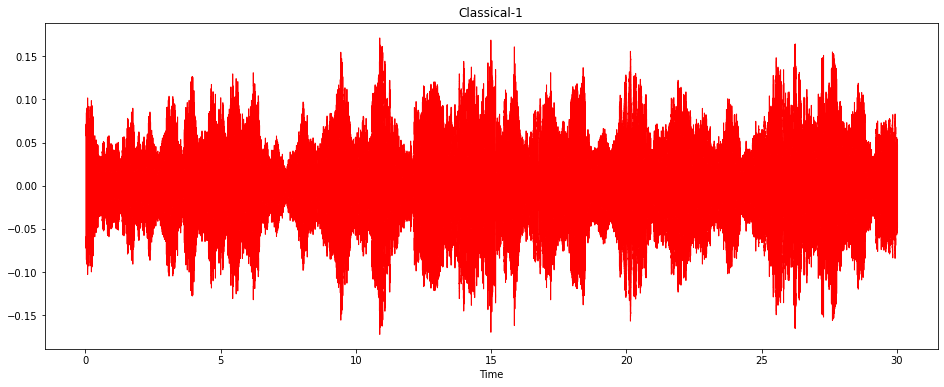

In [6]:
plt.figure(figsize=(16,6))
librosa.display.waveshow(y=audio,sr=sr,color='r')
plt.title('Classical-1')

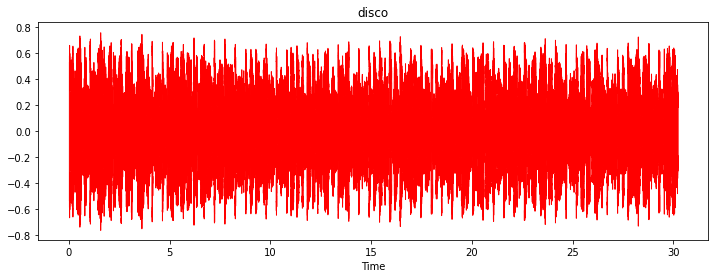

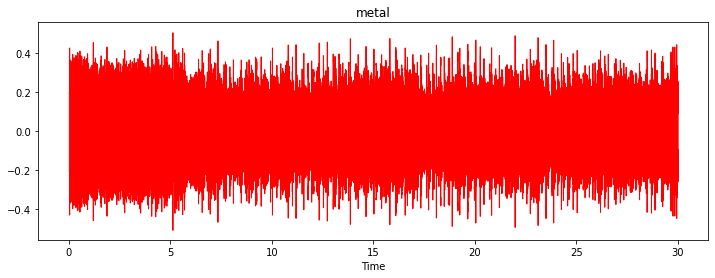

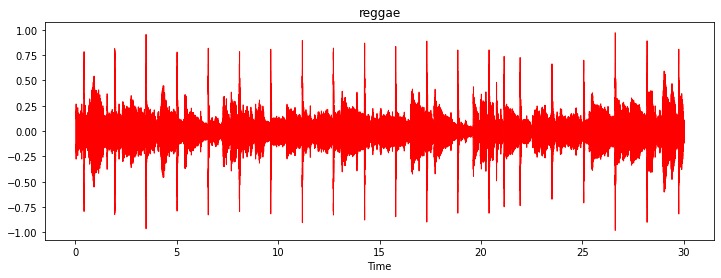

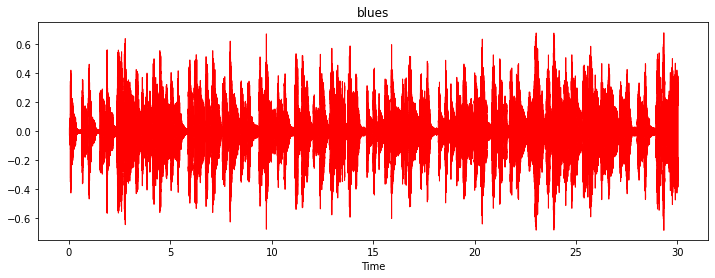

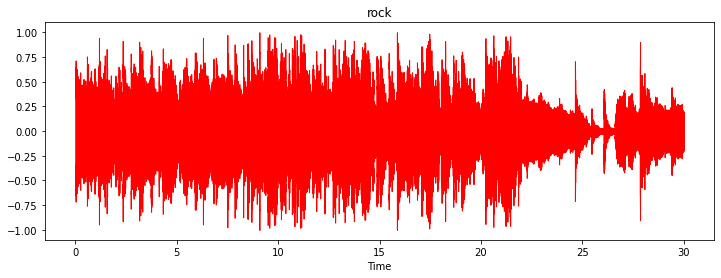

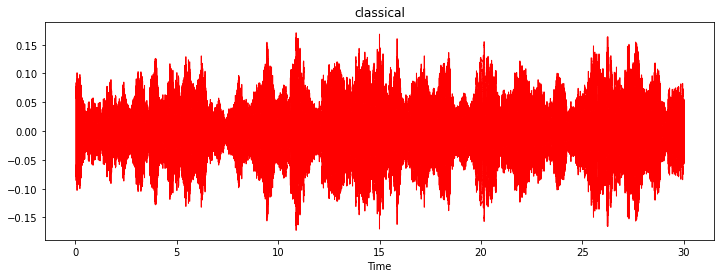

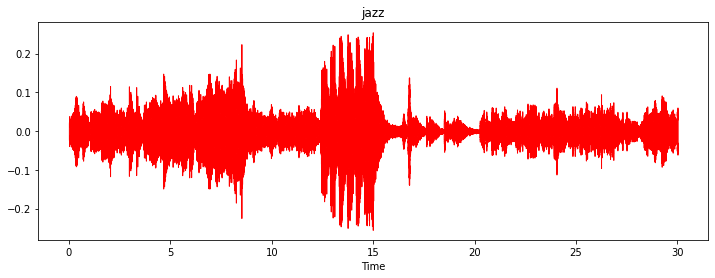

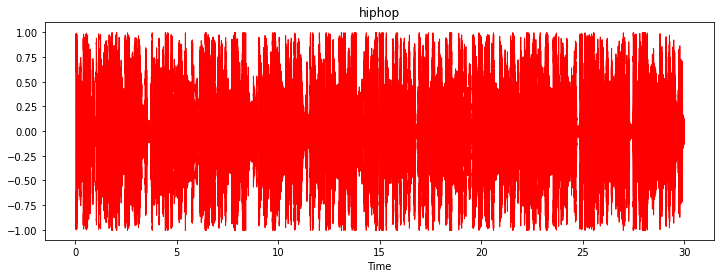

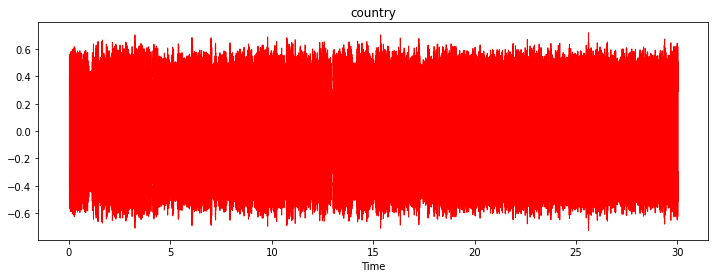

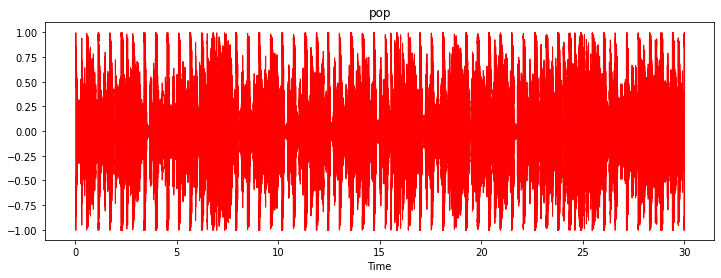

In [7]:
for i in genres:
    aud,sr=librosa.load(os.path.join(path,'genres_original',i,f'{i}.00001.wav'))
    plt.figure(figsize=(12,4))
    librosa.display.waveshow(y=aud,sr=sr,color='r')
    plt.title(f'{i}')

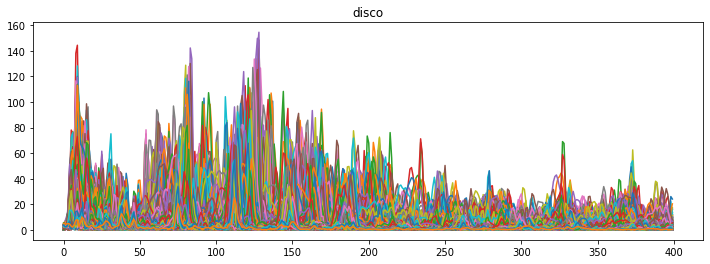

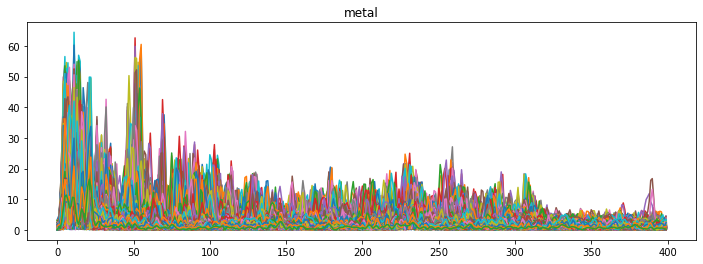

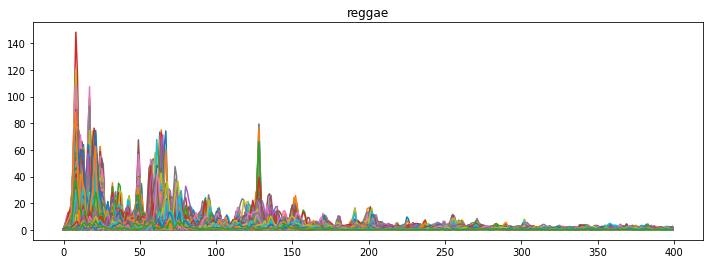

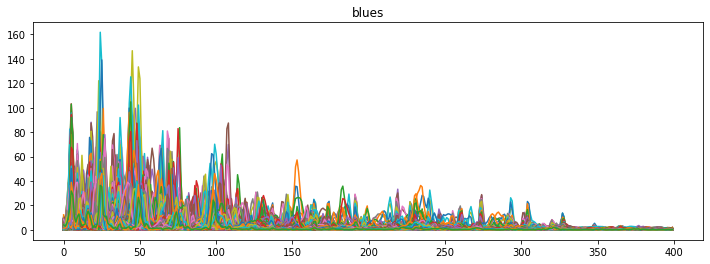

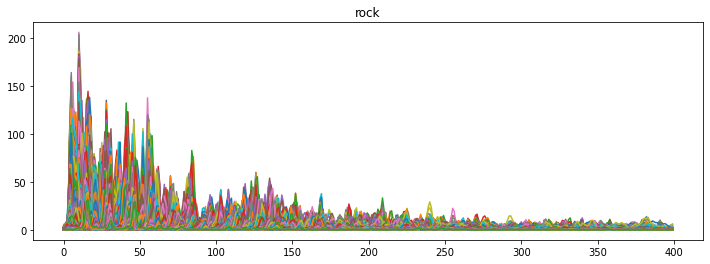

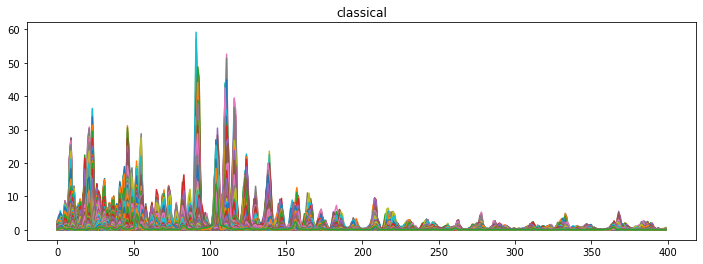

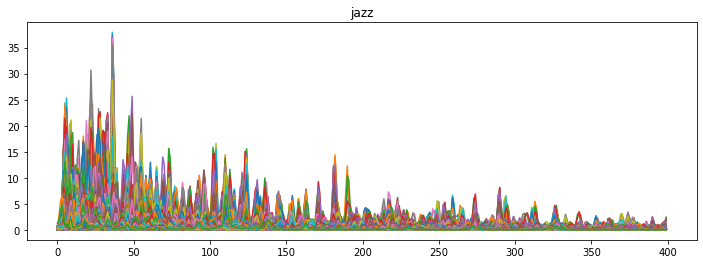

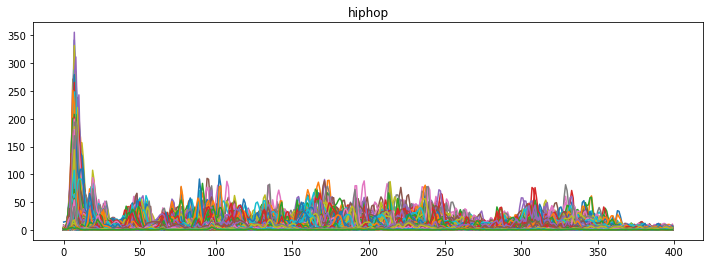

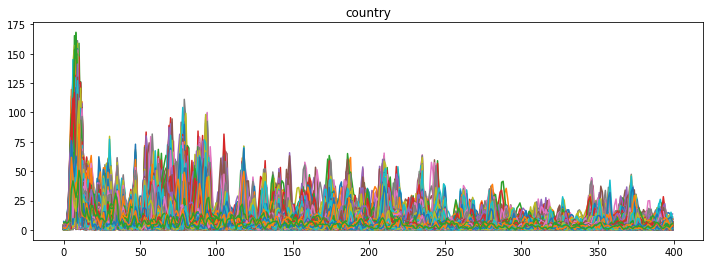

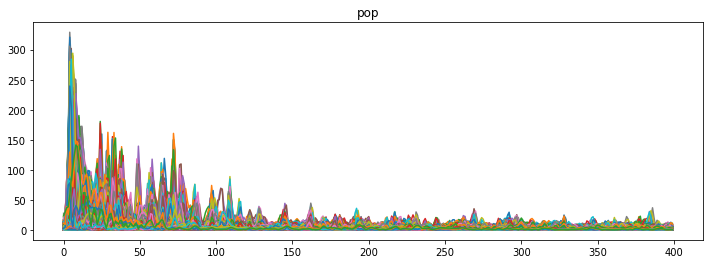

In [8]:
n_fft=2048 #default value recommended, n_ftt represents the number of samples that will be converted at once.
hop_length=512 #understandable by name
win_length=2048 #window using which samples are converted.

for i in genres:
    aud,sr=librosa.load(os.path.join(path,'genres_original',i,f'{i}.00001.wav'))
    aud_ft= np.abs(librosa.stft(aud, n_fft = n_fft, hop_length = hop_length,win_length=win_length))
#     print(np.shape(aud_ft)) #(1025,1302) 
    plt.figure(figsize=(12,4))
    plt.plot(aud_ft[:400,:])#viewing only upto 400 Hz
    plt.title(f'{i}')

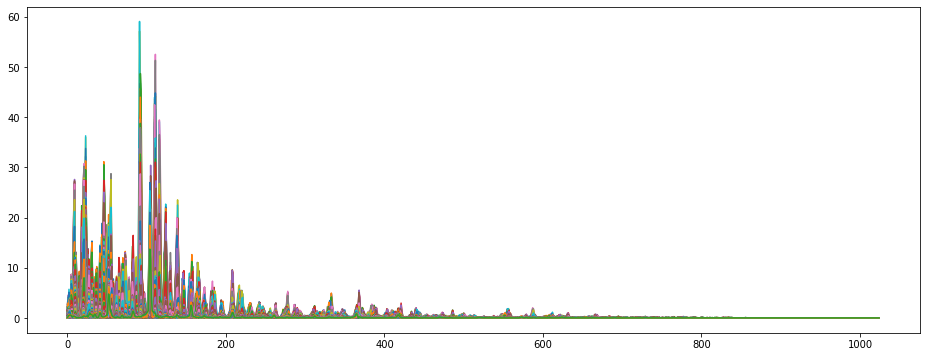

In [9]:
music_stft = np.abs(librosa.stft(audio,n_fft=n_fft,hop_length= hop_length))
plt.figure(figsize = (16,6))
plt.plot(music_stft); #hehe try to remove the semi-colon and see what happens. Good stuff, learned something new

# https://stackoverflow.com/questions/51627233/why-is-there-a-semicolon-after-matplotlibs-plot-function#:~:text=A%20handy%20tip%20is%20that,chunk%20to%20generate%20a%20figure.
# visit the above link for more info 

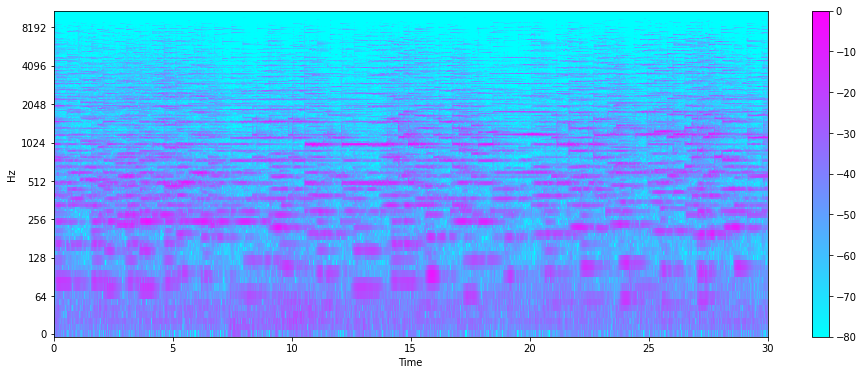

In [10]:
# Converting from amplitute(Linear scale) to decibels, a log scale
music_stft_decibels = librosa.amplitude_to_db(music_stft, ref= np.max) 
# https://stackoverflow.com/questions/63347977/what-is-the-conceptual-purpose-of-librosa-amplitude-to-db
# VISIT THE SAID LINK, u will understand about ref too. 
# Also try to comment this and directly try to plot music_stft

# Plotting the spectogram 
plt.figure(figsize=(16,6))
librosa.display.specshow(music_stft_decibels, sr = sr, hop_length= hop_length, x_axis='time', y_axis='log', cmap = "cool");
plt.colorbar(); #also comment this and c what happens. Here librosa is plotting the data, plt just gives the colorbar
# Yaha par double quote drama kiya. Put and c what error comes up. 

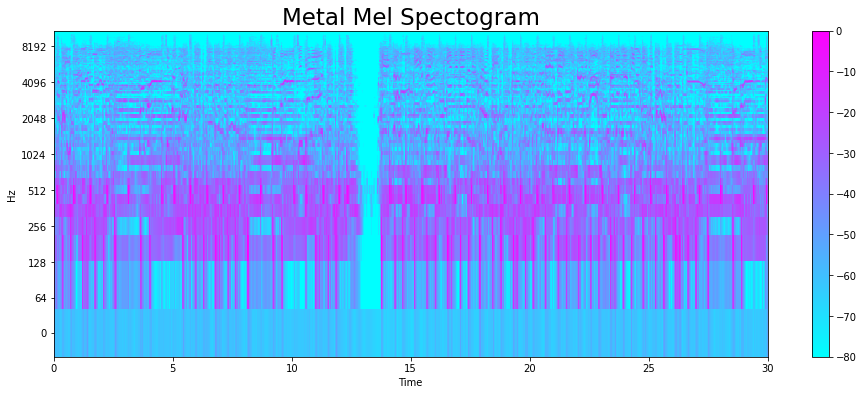

In [11]:
# Mel spectogram 
# https://towardsdatascience.com/getting-to-know-the-mel-spectrogram-31bca3e2d9d0
# Read a bit about it 

metal_sample = "metal/metal.00032.wav"
y, sr = librosa.load(os.path.join(path,"genres_original",metal_sample))
y,_ = librosa.effects.trim(y)
    
S = librosa.feature.melspectrogram(y, sr = sr)
S_DB = librosa.amplitude_to_db(S, ref= np.max)

plt.figure(figsize = (16,6))


librosa.display.specshow(S_DB, sr = sr, hop_length=hop_length, x_axis='time', y_axis='log', cmap='cool')
# https://stackoverflow.com/questions/66235936/why-spectrogram-from-librosa-library-have-different-time-duration-of-the-actual
# Why it is important to provide hop length here
plt.colorbar();
plt.title("Metal Mel Spectogram", fontsize = "23");

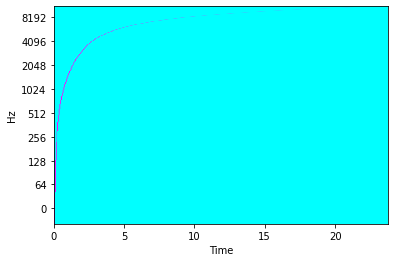

In [12]:
n_mels=128
mel = librosa.filters.mel(sr=sr, n_fft=n_fft, n_mels=n_mels)
librosa.display.specshow(mel, sr = sr, hop_length=hop_length, x_axis='time', y_axis='log', cmap='cool');

In [13]:
zero_crossing_rate=librosa.zero_crossings(y) # has a boolean output
sum(zero_crossing_rate)

98145

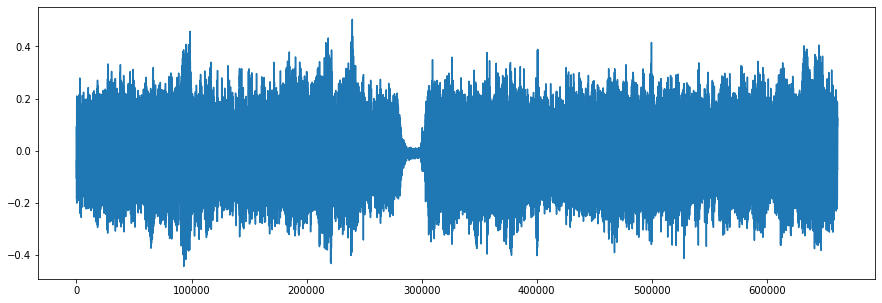

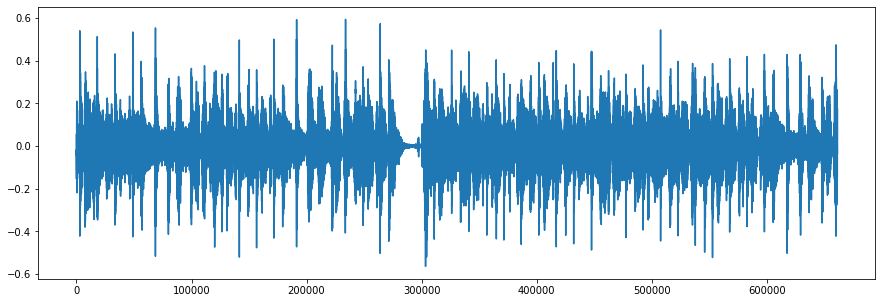

In [14]:
harmonics,percussive=librosa.effects.hpss(y)
plt.figure(figsize=(15,5))
plt.plot(harmonics);
plt.figure(figsize=(15,5))
plt.plot(percussive);

Centroids: [2622.73050509 2881.57344115 3268.66541681 ... 2937.61979423 3196.10716976
 3071.26493668] 

Shape of Spectral Centroids: (1293,) 

frames: range(0, 1293) 

t: [0.00000000e+00 2.32199546e-02 4.64399093e-02 ... 2.99537415e+01
 2.99769615e+01 3.00001814e+01]


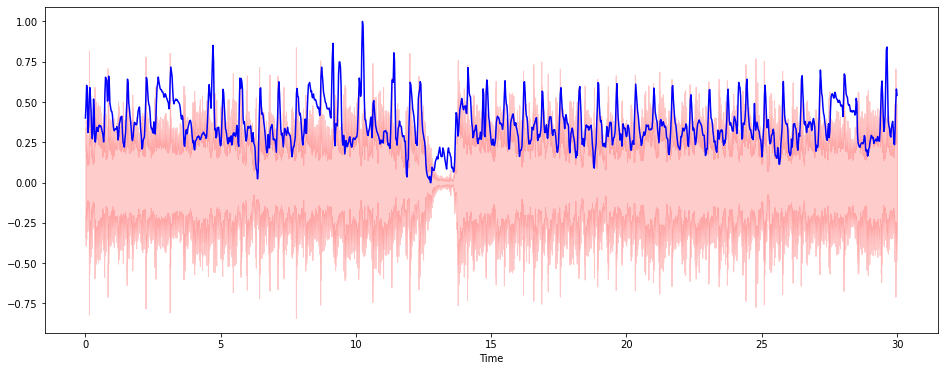

In [15]:
spectral_centroids = librosa.feature.spectral_centroid(y, sr=sr)[0] #returns spectral centroid per frame.
print('Centroids:', spectral_centroids, '\n')
print('Shape of Spectral Centroids:', spectral_centroids.shape, '\n')

# Computing the time variable for visualization
frames = range(len(spectral_centroids))

# Converts frame counts to time (seconds)
t = librosa.frames_to_time(frames)

print('frames:', frames, '\n')
print('t:', t)

# Function that normalizes the Sound Data
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)
plt.figure(figsize = (16, 6))
librosa.display.waveshow(y, sr=sr, alpha=0.2, color = 'red');
plt.plot(t, normalize(spectral_centroids), color='blue');

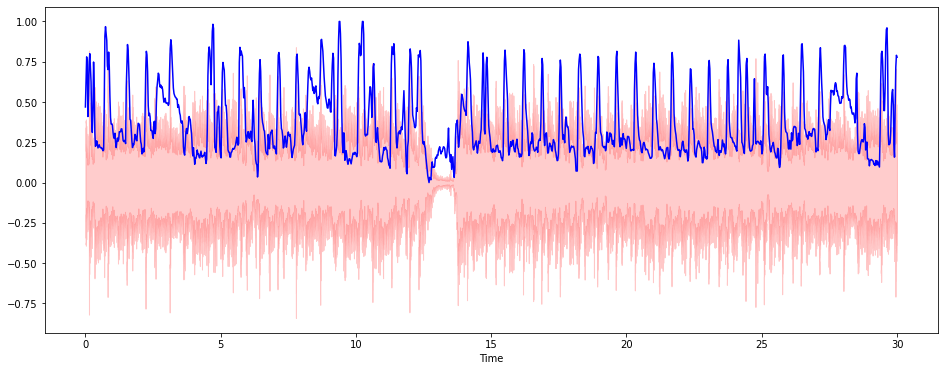

In [16]:
spectral_rolloff = librosa.feature.spectral_rolloff(y, sr=sr)[0]
plt.figure(figsize = (16, 6))
librosa.display.waveshow(y, sr=sr, alpha=0.2, color = 'red');
plt.plot(t, normalize(spectral_rolloff), color='blue');


mfccs shape: (20, 1293)


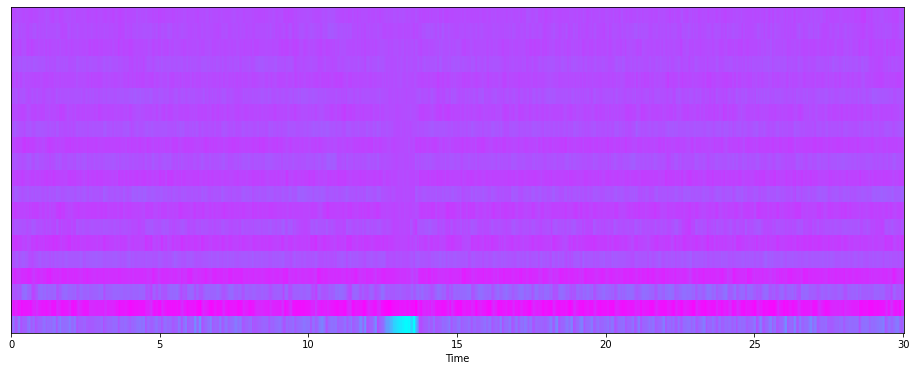

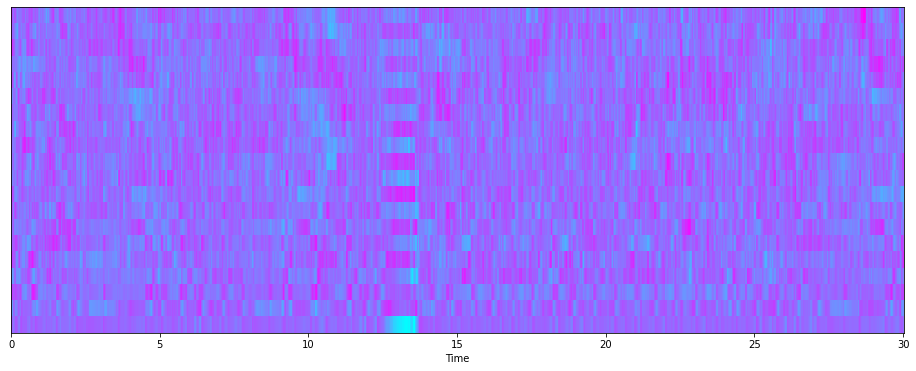

In [17]:
mfccs = librosa.feature.mfcc(y, sr=sr)
print('mfccs shape:', mfccs.shape)
plt.figure(figsize = (16, 6))
librosa.display.specshow(mfccs, sr=sr, x_axis='time', cmap = 'cool');
#the data is in small range, hence need to be scaled.
mfccs = sklearn.preprocessing.scale(mfccs,axis=1)
plt.figure(figsize = (16, 6))
librosa.display.specshow(mfccs, sr=sr, x_axis='time', cmap = 'cool');

Chromogram shape: (12, 1293)


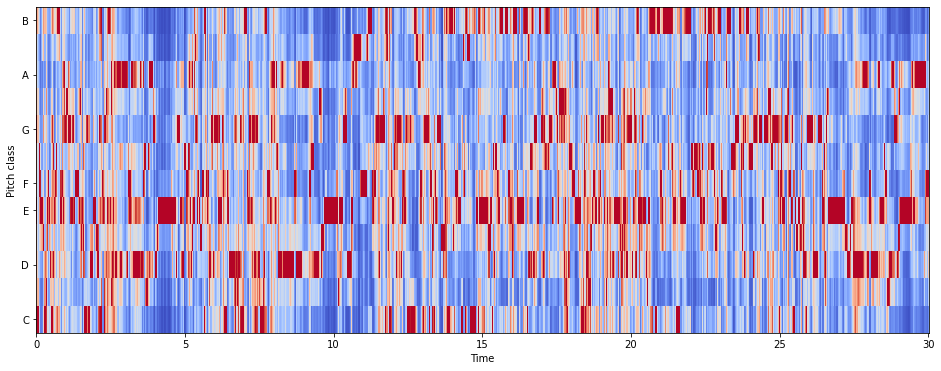

In [18]:
chromagram = librosa.feature.chroma_stft(y, sr=sr, hop_length=hop_length)
print('Chromogram shape:', chromagram.shape)
plt.figure(figsize=(16, 6))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length,cmap='coolwarm');

In [19]:
#reading the 30 s csv
data=pd.read_csv(os.path.join(path,'genere_features_30sec.csv'))
data.head()

,file name,zero_crossings_rate_mean,zero_crossings_rate_var,spectral_centroid_mean,spectral_centroid_var,Spectral Rolloff_mean,Spectral Rolloff_var,spectral_bandwidth_mean,spectral_bandwidth_var,rms_mean,...,mfcc_var_p,mfcc_mean_q,mfcc_var_q,mfcc_mean_r,mfcc_var_r,mfcc_mean_s,mfcc_var_s,mfcc_mean_t,mfcc_var_t,genre
0,/Users/home/Desktop/Music_genre/Data/genres_or...,0.021701,0.000118,570.150688,104951.648432,866.578093,4.931600e+05,995.093473,84457.870140,0.039969,...,35.267280,-3.708840,34.146070,0.175169,34.543175,2.076678,44.244167,-2.892004,61.476616,blues
1,/Users/home/Desktop/Music_genre/Data/genres_or...,0.050889,0.001155,1441.999254,387323.611152,3040.598281,2.201010e+06,1870.239191,146888.711245,0.095635,...,61.712437,-6.266028,53.565445,0.951334,64.032364,2.006461,68.354385,-5.735763,84.034630,blues
2,/Users/home/Desktop/Music_genre/Data/genres_or...,0.085806,0.001220,1945.620794,147369.551256,4152.633223,8.076960e+05,2082.176477,73369.006624,0.109534,...,33.836433,-8.717001,38.787235,-0.325246,56.951794,-2.984734,42.425682,0.714617,55.568150,blues
3,/Users/home/Desktop/Music_genre/Data/genres_or...,0.092570,0.000900,2279.265543,170943.704603,5209.485166,5.667529e+05,2375.084795,53001.032278,0.082639,...,61.300636,0.020586,73.273544,-0.739238,56.313297,-5.130451,96.007970,3.307131,92.614930,blues
4,/Users/home/Desktop/Music_genre/Data/genres_or...,0.123863,0.000557,2333.716389,89830.069394,4930.020189,4.824595e+05,2227.415627,30643.873814,0.155032,...,24.009264,-11.333126,35.233288,3.168496,30.374691,-4.571701,46.855360,-4.033881,35.250755,blues


In [20]:
data.columns

Index(['file name', 'zero_crossings_rate_mean', 'zero_crossings_rate_var',
       'spectral_centroid_mean', 'spectral_centroid_var',
       'Spectral Rolloff_mean', 'Spectral Rolloff_var',
       'spectral_bandwidth_mean', 'spectral_bandwidth_var', 'rms_mean',
       'rms_var', 'tempo', 'Chroma features_mean', 'Chroma features_var',
       'mfcc_mean_a', 'mfcc_var_a', 'mfcc_mean_b', 'mfcc_var_b', 'mfcc_mean_c',
       'mfcc_var_c', 'mfcc_mean_d', 'mfcc_var_d', 'mfcc_mean_e', 'mfcc_var_e',
       'mfcc_mean_f', 'mfcc_var_f', 'mfcc_mean_g', 'mfcc_var_g', 'mfcc_mean_h',
       'mfcc_var_h', 'mfcc_mean_i', 'mfcc_var_i', 'mfcc_mean_j', 'mfcc_var_j',
       'mfcc_mean_k', 'mfcc_var_k', 'mfcc_mean_l', 'mfcc_var_l', 'mfcc_mean_m',
       'mfcc_var_m', 'mfcc_mean_n', 'mfcc_var_n', 'mfcc_mean_o', 'mfcc_var_o',
       'mfcc_mean_p', 'mfcc_var_p', 'mfcc_mean_q', 'mfcc_var_q', 'mfcc_mean_r',
       'mfcc_var_r', 'mfcc_mean_s', 'mfcc_var_s', 'mfcc_mean_t', 'mfcc_var_t',
       'genre'],
      dtype=

In [22]:
from sklearn import preprocessing
data=data.iloc[0:,1:]
Y=data.loc[:,'genre']
X=data.loc[:,data.columns!='genre']

cols=X.columns
min_max_scaler=preprocessing.MinMaxScaler()
scaled_X=min_max_scaler.fit_transform(X) #the column names are removed
X=pd.DataFrame(scaled_X,columns=cols)

In [23]:
from sklearn.decomposition import PCA
n=10
pca=PCA(n_components=n)
pc=pca.fit_transform(X)
col_names=[f'PC{i}' for i in range(1,n+1)]
data_X=pd.DataFrame(data=pc,columns=col_names)

final_df=pd.concat([data_X,Y],axis=1)
final_df.head()
# pca.explained_variance_ratio_ # sum of variances on each pca(noticed it decreases quite exponentially with n_components)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,genre
0,0.224703,0.760497,-0.461510,0.085157,-0.638095,0.036384,-0.419769,-0.094976,0.014034,-0.206014,blues
1,0.053489,0.315612,0.421285,-0.204265,-0.043065,-0.109190,0.230191,-0.117591,0.253689,-0.034346,blues
2,-0.565159,-0.081064,-0.000955,-0.073253,-0.165487,-0.082249,-0.022181,-0.161797,0.195411,-0.044409,blues
3,-0.657028,-0.112366,0.020530,0.205228,0.130699,0.195105,-0.019018,-0.248313,0.185263,0.015656,blues
4,-0.890384,-0.276280,-0.113861,-0.140454,0.065038,-0.177129,-0.113470,0.014342,0.200595,0.165062,blues


Text(0, 0.5, 'Principal Component 2')

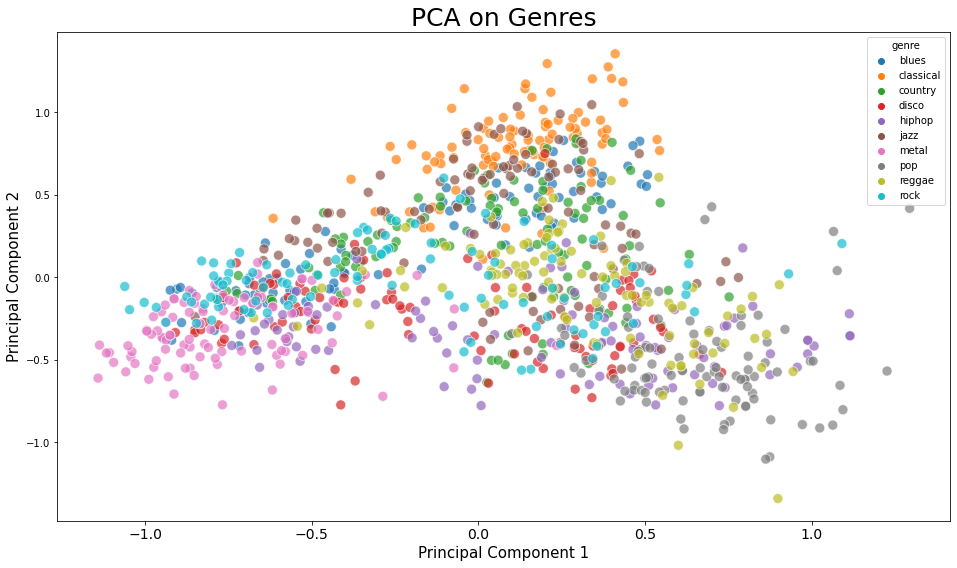

In [25]:
plt.figure(figsize = (16, 9))
sns.scatterplot(x = "PC1", y = "PC2", data = final_df, hue = "genre", alpha = 0.7,
               s = 100);

plt.title('PCA on Genres', fontsize = 25)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Principal Component 1", fontsize = 15)
plt.ylabel("Principal Component 2", fontsize = 15)

Text(0, 0.5, 'Principal Component 10')

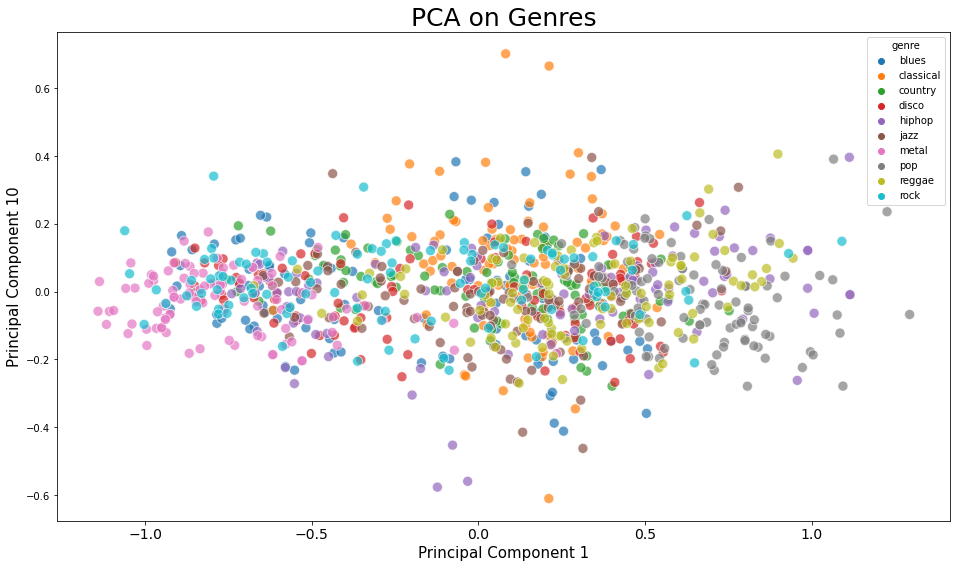

In [26]:
plt.figure(figsize = (16, 9))
sns.scatterplot(x = "PC1", y = "PC10", data = final_df, hue = "genre", alpha = 0.7,
               s = 100);

plt.title('PCA on Genres', fontsize = 25)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Principal Component 1", fontsize = 15)
plt.ylabel("Principal Component 10", fontsize = 15)

In [27]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from xgboost import plot_tree, plot_importance

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

In [49]:
#reading the 3 s csv
data= pd.read_csv(os.path.join(path,'genere_features_3sec.csv'))
data.head()

,file name,zero_crossings_rate_mean,zero_crossings_rate_var,spectral_centroid_mean,spectral_centroid_var,Spectral Rolloff_mean,Spectral Rolloff_var,spectral_bandwidth_mean,spectral_bandwidth_var,rms_mean,...,mfcc_var_p,mfcc_mean_q,mfcc_var_q,mfcc_mean_r,mfcc_var_r,mfcc_mean_s,mfcc_var_s,mfcc_mean_t,mfcc_var_t,genre
0,/Users/home/Desktop/Music_genre/Data/genres_ma...,0.077821,0.000470,1401.353002,80340.577097,2540.586689,5.046697e+05,1524.966064,94694.007962,0.102879,...,51.905434,-11.873516,42.708893,-6.257140,48.574467,-7.808784,25.510319,-0.534734,20.457575,blues
1,/Users/home/Desktop/Music_genre/Data/genres_ma...,0.065869,0.002040,1414.660412,209517.313833,2830.539551,9.485885e+05,1774.738041,75778.646605,0.068254,...,147.054150,5.788699,195.649000,10.457111,188.463550,3.028225,159.936940,-13.841378,209.449170,blues
2,/Users/home/Desktop/Music_genre/Data/genres_ma...,0.109383,0.001899,2098.803580,202249.209837,4085.428373,7.318834e+05,1988.339879,66650.266934,0.129991,...,53.531310,-11.156727,37.201410,-2.599979,42.733337,-5.670016,33.037228,-1.861633,35.311005,blues
3,/Users/home/Desktop/Music_genre/Data/genres_ma...,0.111580,0.001020,2273.753235,180104.776459,4775.650353,6.983574e+05,2176.867321,55680.580348,0.080481,...,60.256220,-10.642820,82.340990,11.782791,65.998250,-1.185579,87.062910,-0.182698,59.514587,blues
4,/Users/home/Desktop/Music_genre/Data/genres_ma...,0.062444,0.000757,1784.122038,438721.636302,4013.623422,2.175442e+06,2169.249819,131894.056527,0.086142,...,63.199924,-3.550621,61.210804,-5.021430,51.953705,3.558551,47.784653,-8.465635,130.422150,blues


In [87]:
data.columns

Index(['spectral_centroid_mean', 'spectral_centroid_var',
       'Spectral Rolloff_mean', 'Spectral Rolloff_var',
       'spectral_bandwidth_mean', 'spectral_bandwidth_var', 'rms_mean',
       'rms_var', 'tempo', 'Chroma features_mean', 'Chroma features_var',
       'mfcc_mean_a', 'mfcc_var_a', 'mfcc_mean_b', 'mfcc_var_b', 'mfcc_mean_c',
       'mfcc_var_c', 'mfcc_mean_d', 'mfcc_var_d', 'mfcc_mean_e', 'mfcc_var_e',
       'mfcc_mean_f', 'mfcc_var_f', 'mfcc_mean_g', 'mfcc_var_g', 'mfcc_mean_h',
       'mfcc_var_h', 'mfcc_mean_i', 'mfcc_var_i', 'mfcc_mean_j', 'mfcc_var_j',
       'mfcc_mean_k', 'mfcc_var_k', 'mfcc_mean_l', 'mfcc_var_l', 'mfcc_mean_m',
       'mfcc_var_m', 'mfcc_mean_n', 'mfcc_var_n', 'mfcc_mean_o', 'mfcc_var_o',
       'mfcc_mean_p', 'mfcc_var_p', 'mfcc_mean_q', 'mfcc_var_q', 'mfcc_mean_r',
       'mfcc_var_r', 'mfcc_mean_s', 'mfcc_var_s', 'mfcc_mean_t', 'mfcc_var_t',
       'genre'],
      dtype='object')

In [89]:
#Thai music
path1='../input/thaimusic'
data1 = pd.read_csv(os.path.join(path1,'genere_features3sec_thai.csv'))
data1.head()

,file name,zero_crossings_rate_mean,zero_crossings_rate_var,spectral_centroid_mean,spectral_centroid_var,Spectral Rolloff_mean,Spectral Rolloff_var,spectral_bandwidth_mean,spectral_bandwidth_var,rms_mean,...,mfcc_var_p,mfcc_mean_q,mfcc_var_q,mfcc_mean_r,mfcc_var_r,mfcc_mean_s,mfcc_var_s,mfcc_mean_t,mfcc_var_t,genre
0,D:\Music Genre\THAi3sec/Blues\Blueth0.wav_1.wa...,0.084548,0.000934,2073.819211,272198.655019,4510.791955,1.567043e+06,2285.064933,121634.761398,0.161642,...,46.821830,-11.330988,45.091633,2.098588,63.597880,-2.354681,59.303905,4.449757,55.172215,blues
1,D:\Music Genre\THAi3sec/Blues\Blueth0.wav_1.wa...,0.089772,0.000876,2220.725850,159989.872975,4828.406701,1.295036e+06,2362.365770,156057.411170,0.150149,...,22.579018,-7.851931,50.035763,0.653406,23.069310,-8.009843,26.532557,-0.593532,36.332172,blues
2,D:\Music Genre\THAi3sec/Blues\Blueth0.wav_1.wa...,0.091384,0.000808,2071.364269,189703.365029,4426.067082,1.360037e+06,2294.573879,123618.205872,0.158550,...,31.610254,-7.308398,35.171170,2.445208,36.259697,-6.176403,22.084240,-0.676834,22.520926,blues
3,D:\Music Genre\THAi3sec/Blues\Blueth0.wav_1.wa...,0.083530,0.000931,1947.302807,239272.385046,4318.401067,1.633318e+06,2209.355353,142751.714844,0.185865,...,29.917746,-6.290719,41.509674,-1.117368,26.292189,-11.999935,70.598580,-8.113975,52.826557,blues
4,D:\Music Genre\THAi3sec/Blues\Blueth0.wav_1.wa...,0.088585,0.001043,2016.130501,224002.906770,4482.384691,1.783243e+06,2292.772561,147616.175589,0.143263,...,33.368427,-7.951792,37.623783,5.554890,27.902939,-6.756302,12.609789,-2.989964,35.241480,blues


In [90]:
data1.columns

Index(['file name', 'zero_crossings_rate_mean', 'zero_crossings_rate_var',
       'spectral_centroid_mean', 'spectral_centroid_var',
       'Spectral Rolloff_mean', 'Spectral Rolloff_var',
       'spectral_bandwidth_mean', 'spectral_bandwidth_var', 'rms_mean',
       'rms_var', 'tempo', 'Chroma features_mean', 'Chroma features_var',
       'mfcc_mean_a', 'mfcc_var_a', 'mfcc_mean_b', 'mfcc_var_b', 'mfcc_mean_c',
       'mfcc_var_c', 'mfcc_mean_d', 'mfcc_var_d', 'mfcc_mean_e', 'mfcc_var_e',
       'mfcc_mean_f', 'mfcc_var_f', 'mfcc_mean_g', 'mfcc_var_g', 'mfcc_mean_h',
       'mfcc_var_h', 'mfcc_mean_i', 'mfcc_var_i', 'mfcc_mean_j', 'mfcc_var_j',
       'mfcc_mean_k', 'mfcc_var_k', 'mfcc_mean_l', 'mfcc_var_l', 'mfcc_mean_m',
       'mfcc_var_m', 'mfcc_mean_n', 'mfcc_var_n', 'mfcc_mean_o', 'mfcc_var_o',
       'mfcc_mean_p', 'mfcc_var_p', 'mfcc_mean_q', 'mfcc_var_q', 'mfcc_mean_r',
       'mfcc_var_r', 'mfcc_mean_s', 'mfcc_var_s', 'mfcc_mean_t', 'mfcc_var_t',
       'genre'],
      dtype=

In [91]:
data1.shape

(2000, 55)

In [80]:
data=data.iloc[0:,1:]
Y=data.loc[:,'genre']
X=data.loc[:,data.columns!='genre']

cols=X.columns
scaler=preprocessing.MinMaxScaler()
scaled_X=scaler.fit_transform(X)


X=pd.DataFrame(scaled_X,columns=cols)


In [93]:
data1=data1.iloc[0:,1:]
B=data1.loc[:,'genre']
A=data1.loc[:,data1.columns!='genre']

cols1=A.columns
scaler1=preprocessing.MinMaxScaler()
scaled_A=scaler1.fit_transform(A)


A=pd.DataFrame(scaled_A,columns=cols1)



In [94]:
data1.shape

(2000, 53)

In [61]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=21)

In [78]:
def model_assess(model,title):
    model.fit(X_train,y_train)
    preds=model.predict(X_test)
    print('Accuracy', title, ':', round(accuracy_score(y_test, preds), 5), '\n')

In [79]:
# Naive Bayes
nb = GaussianNB()
model_assess(nb, "Naive Bayes")

# Stochastic Gradient Descent
sgd = SGDClassifier(max_iter=5000, random_state=0)
model_assess(sgd, "Stochastic Gradient Descent")

# KNN
knn = KNeighborsClassifier(n_neighbors=19)
model_assess(knn, "KNN")

# Decission trees
tree = DecisionTreeClassifier()
model_assess(tree, "Decission trees")

# Random Forest
rforest = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0)
model_assess(rforest, "Random Forest")

# Support Vector Machine
svm = SVC(decision_function_shape="ovo")
model_assess(svm, "Support Vector Machine")

# Logistic Regression
lg = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
model_assess(lg, "Logistic Regression")

# Neural Nets
nn = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5000, 10), random_state=1)
model_assess(nn, "Neural Nets")

Accuracy Naive Bayes : 0.521 

Accuracy Stochastic Gradient Descent : 0.59967 

Accuracy KNN : 0.81 

Accuracy Decission trees : 0.604 

Accuracy Random Forest : 0.79167 

Accuracy Support Vector Machine : 0.74433 

Accuracy Logistic Regression : 0.679 

Accuracy Neural Nets : 0.61967 



In [103]:
A_train,A_test,b_train,b_test=train_test_split(A,B,test_size=0.3,random_state=21)

In [99]:
def model_assess(model,title):
    model.fit(X_train,y_train)
    preds=model.predict(A_test)
    print('Accuracy', title, ':', round(accuracy_score(b_test, preds), 5), '\n')

In [100]:
# Naive Bayes
nb = GaussianNB()
model_assess(nb, "Naive Bayes")

# Stochastic Gradient Descent
sgd = SGDClassifier(max_iter=5000, random_state=0)
model_assess(sgd, "Stochastic Gradient Descent")

# KNN
knn = KNeighborsClassifier(n_neighbors=19)
model_assess(knn, "KNN")

# Decission trees
tree = DecisionTreeClassifier()
model_assess(tree, "Decission trees")

# Random Forest
rforest = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0)
model_assess(rforest, "Random Forest")

# Support Vector Machine
svm = SVC(decision_function_shape="ovo")
model_assess(svm, "Support Vector Machine")

# Logistic Regression
lg = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
model_assess(lg, "Logistic Regression")

# Neural Nets
nn = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5000, 10), random_state=1)
model_assess(nn, "Neural Nets")

Accuracy Naive Bayes : 0.296 

Accuracy Stochastic Gradient Descent : 0.353 

Accuracy KNN : 0.344 

Accuracy Decission trees : 0.229 

Accuracy Random Forest : 0.322 

Accuracy Support Vector Machine : 0.341 

Accuracy Logistic Regression : 0.328 

Accuracy Neural Nets : 0.342 



In [104]:
def model_assess(model,title):
    model.fit(A_train,b_train)
    preds=model.predict(A_test)
    print('Accuracy', title, ':', round(accuracy_score(b_test, preds), 5), '\n')

In [105]:
# Naive Bayes
nb = GaussianNB()
model_assess(nb, "Naive Bayes")

# Stochastic Gradient Descent
sgd = SGDClassifier(max_iter=5000, random_state=0)
model_assess(sgd, "Stochastic Gradient Descent")

# KNN
knn = KNeighborsClassifier(n_neighbors=19)
model_assess(knn, "KNN")

# Decission trees
tree = DecisionTreeClassifier()
model_assess(tree, "Decission trees")

# Random Forest
rforest = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0)
model_assess(rforest, "Random Forest")

# Support Vector Machine
svm = SVC(decision_function_shape="ovo")
model_assess(svm, "Support Vector Machine")

# Logistic Regression
lg = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
model_assess(lg, "Logistic Regression")

# Neural Nets
nn = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5000, 10), random_state=1)
model_assess(nn, "Neural Nets")

Accuracy Naive Bayes : 0.59333 

Accuracy Stochastic Gradient Descent : 0.66 

Accuracy KNN : 0.74667 

Accuracy Decission trees : 0.57667 

Accuracy Random Forest : 0.82167 

Accuracy Support Vector Machine : 0.78333 

Accuracy Logistic Regression : 0.725 

Accuracy Neural Nets : 0.70833 



In [34]:
#improving xgb gradient booster
xgb1=XGBClassifier(n_estimators=1400,learning_rate=0.03)
xgb1.fit(X_train,y_train)
preds=xgb1.predict(X_test)
print('Accuracy',"xgb1", ':', round(accuracy_score(y_test, preds), 5), '\n')

#the accuracy doesn't increase much.

Accuracy xgb1 : 0.876 



In [37]:
# Libraries

from sklearn.metrics.pairwise import cosine_similarity
from sklearn import preprocessing

# Read data
data = pd.read_csv(f'{path}/genere_features_30sec.csv', index_col='file name')

# Extract labels
labels = data[['genre']]

# Drop labels from original dataframe
data = data.drop(columns=['genre'])
data.head()

# Scale the data
data_scaled=preprocessing.scale(data)
print('Scaled data type:', type(data_scaled))
# data_scaled

Scaled data type: <class 'numpy.ndarray'>
